In [24]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.metrics import mean_squared_error, roc_auc_score
from math import sqrt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB


In [22]:
df.isnull().sum()

id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [5]:
#mdea kas nendega peaks midagi tegema või mitte?

df.duplicated().sum()

24206

In [25]:

corr_matrix = df.corr()
diabetes_corr = corr_matrix['Diabetes_binary']
diabetes_corr_list = diabetes_corr.tolist()
#print(diabetes_corr_list)

copy = df.copy()

for column in copy.columns:
    over_threshold = 0
    algne_korrelatsioon = df[[column, 'Diabetes_binary']].corr().abs().iloc[0, 1]
    x = 1
    for _ in range(x):
        np.random.shuffle(copy[column].values)
        correlation = copy[[column, 'Diabetes_binary']].corr().abs().iloc[0, 1]
        #print(f'Korrelatsioon veeru {column} ja Diabetes_binary vahel: {correlation}')
        if correlation > algne_korrelatsioon:
            print("leitud")
            over_threshold += 1
    if (x * 0.05) < over_threshold: # veerud, mida droppida tahame
        print(column)
            
        

## Visualising the data

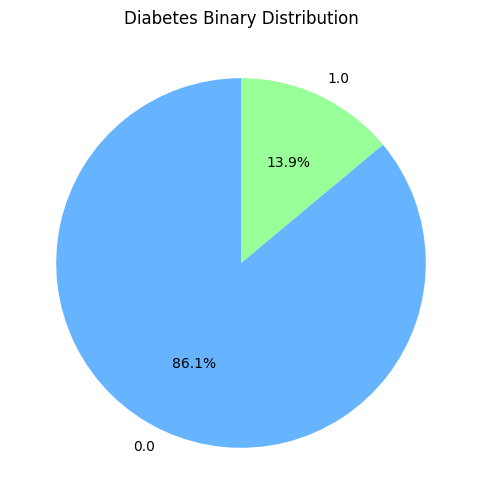

In [26]:
diabetes_counts = df['Diabetes_binary'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Diabetes Binary Distribution')
plt.show()

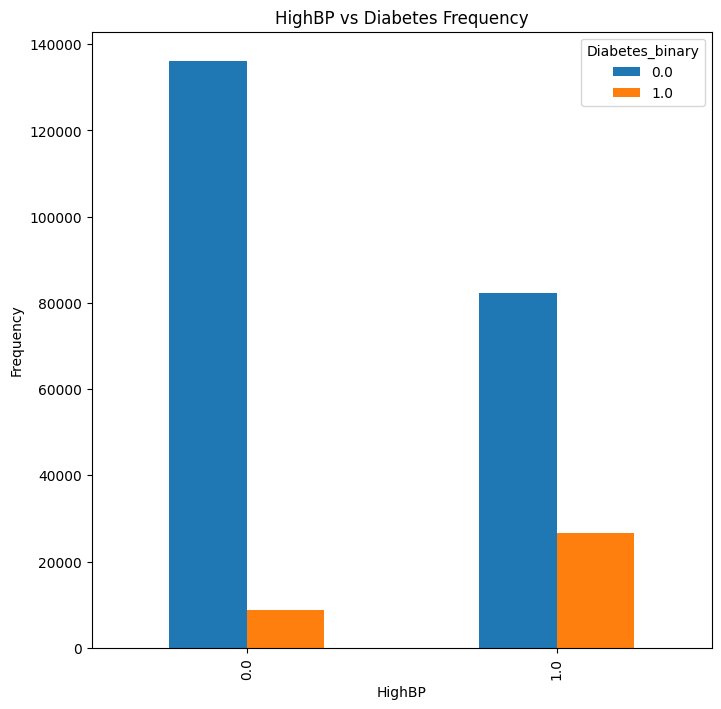

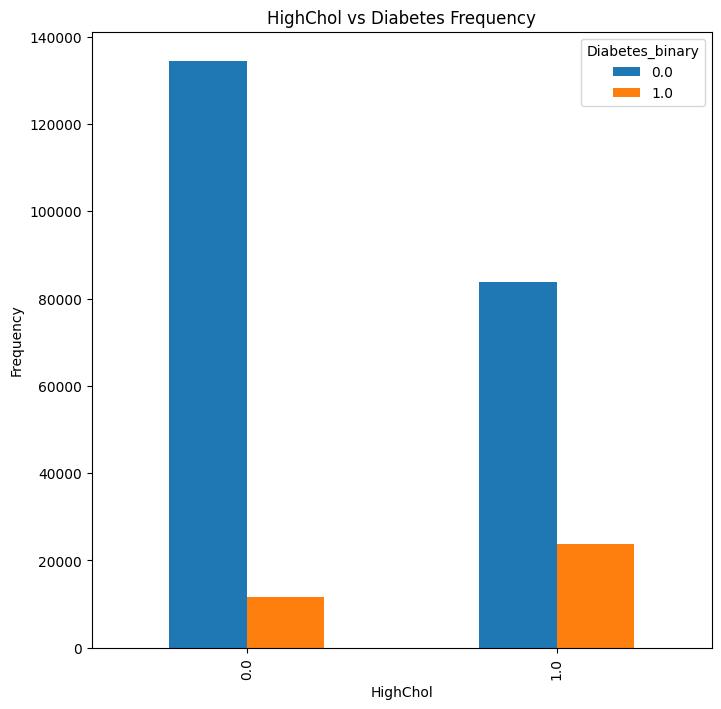

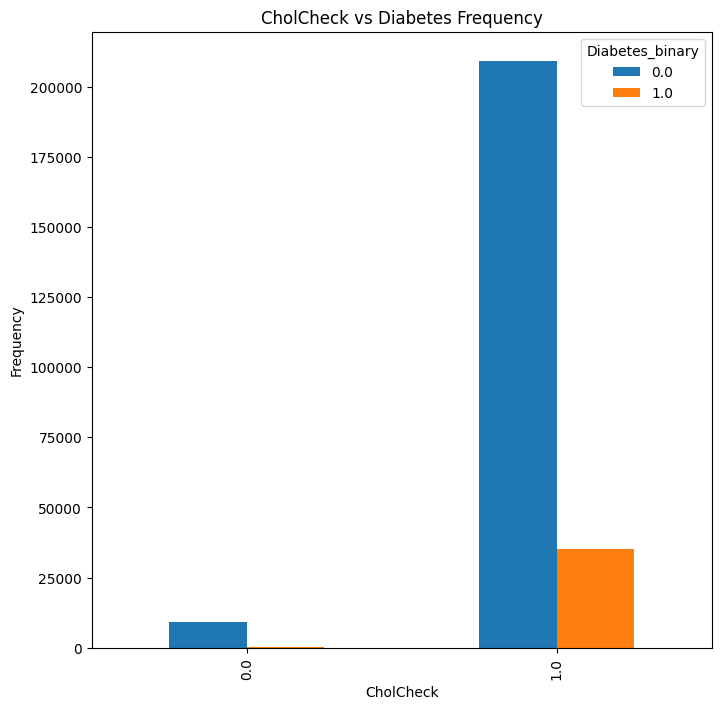

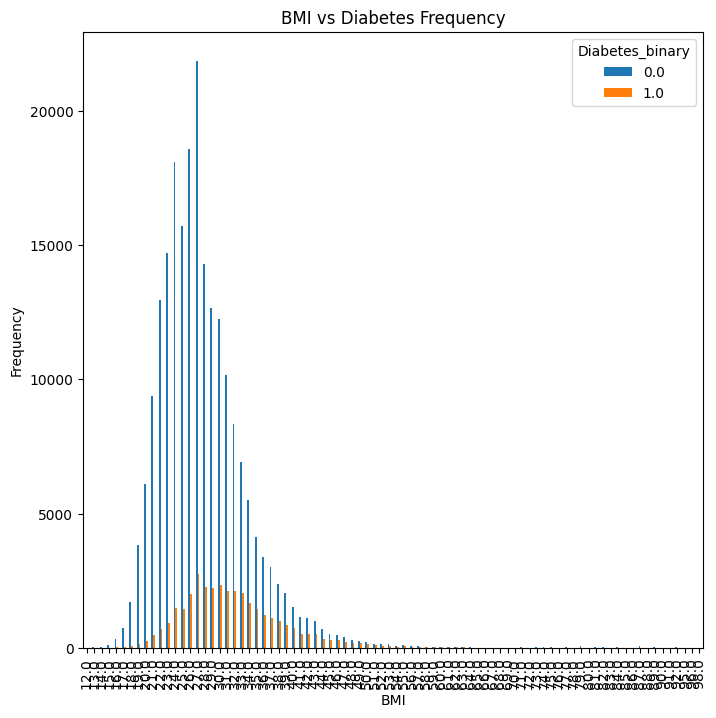

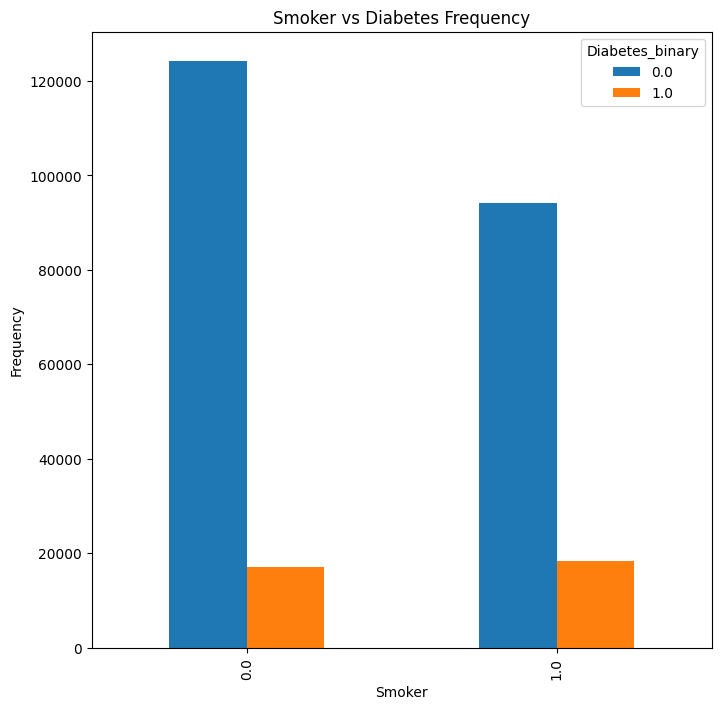

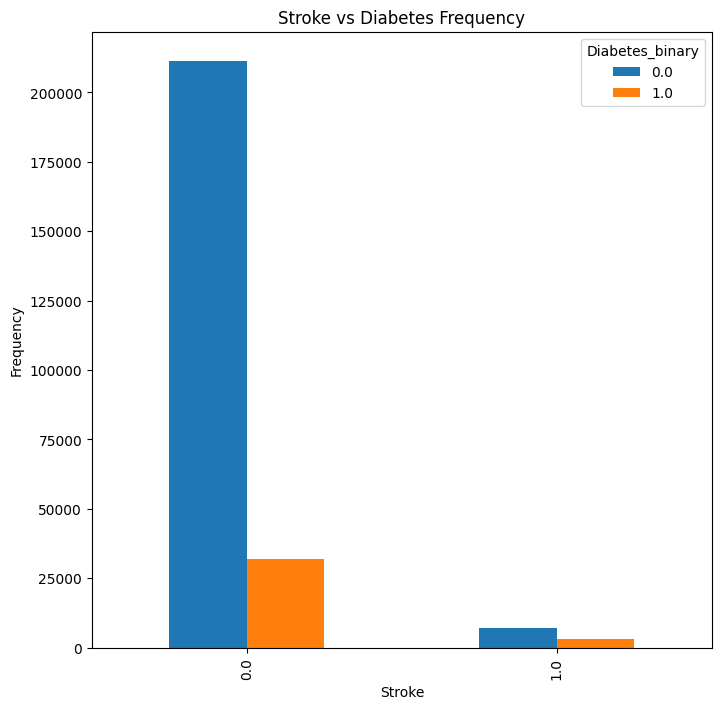

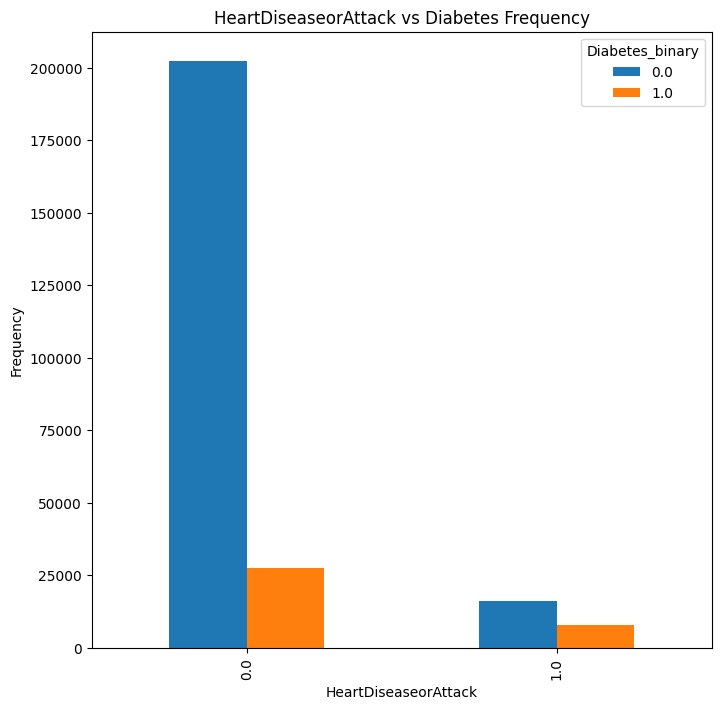

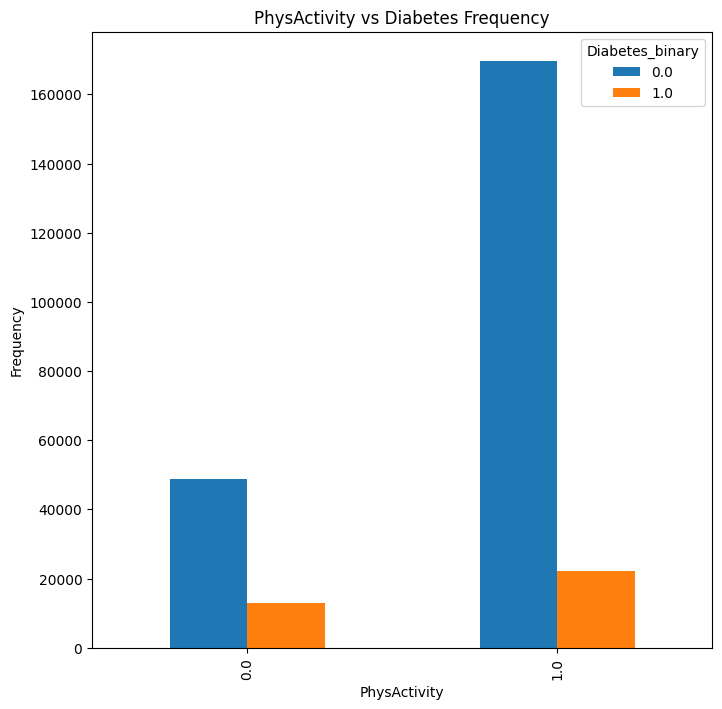

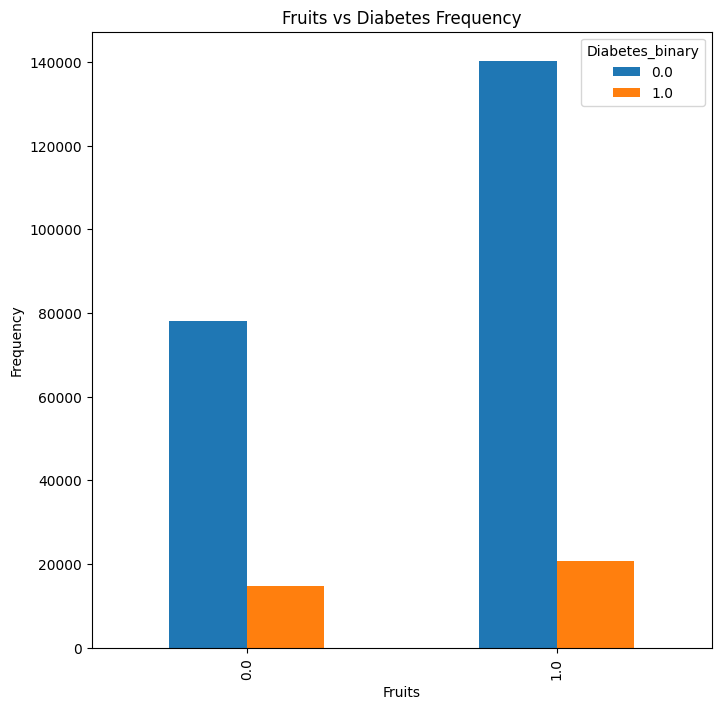

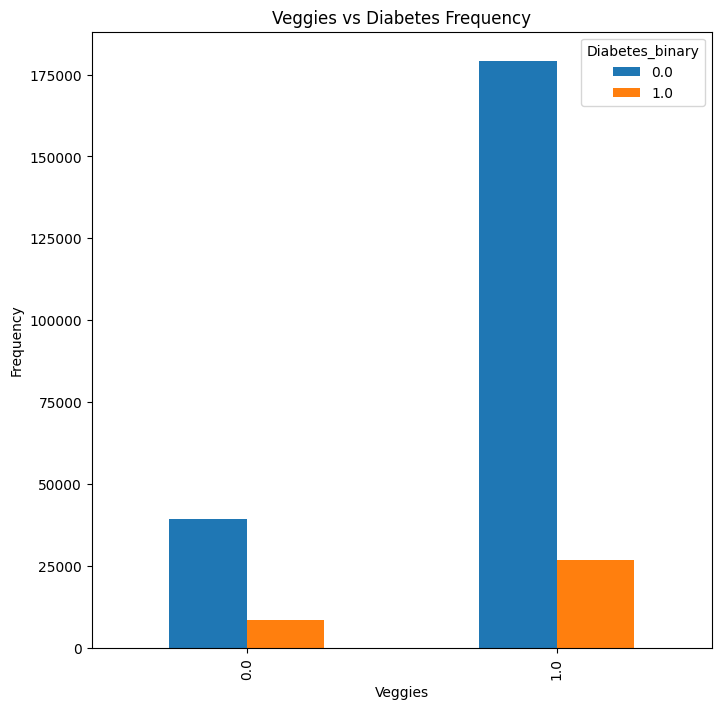

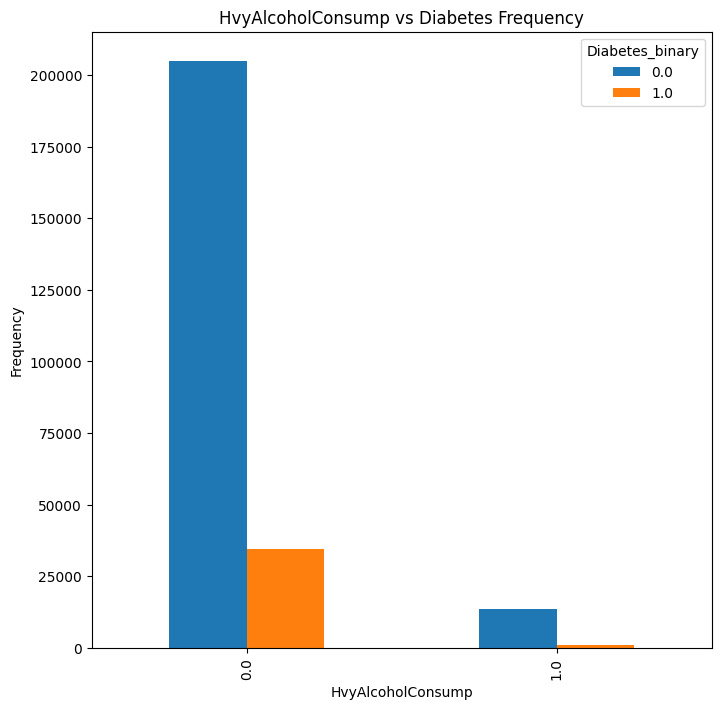

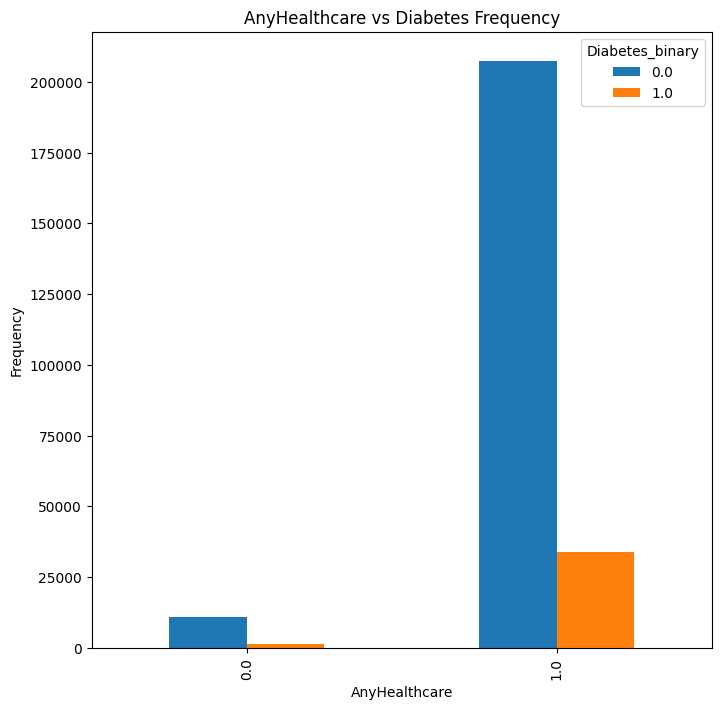

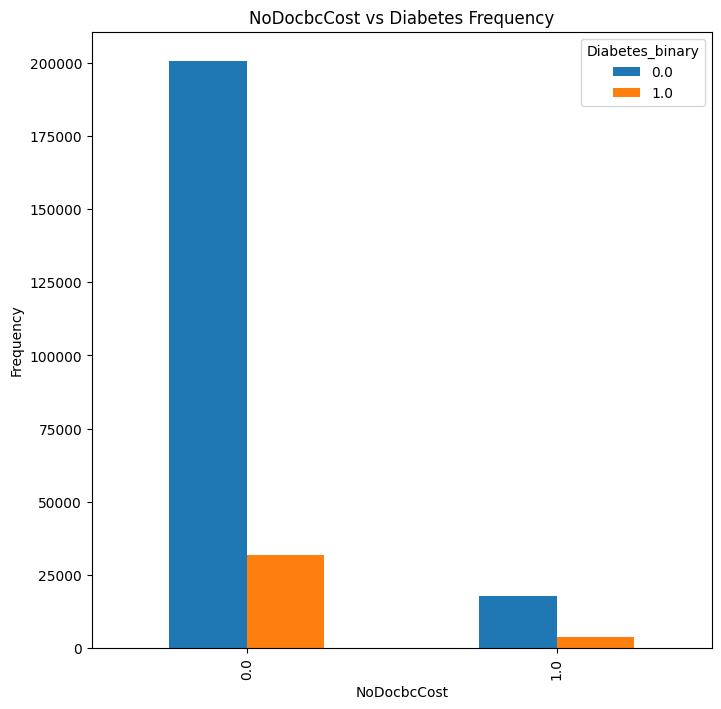

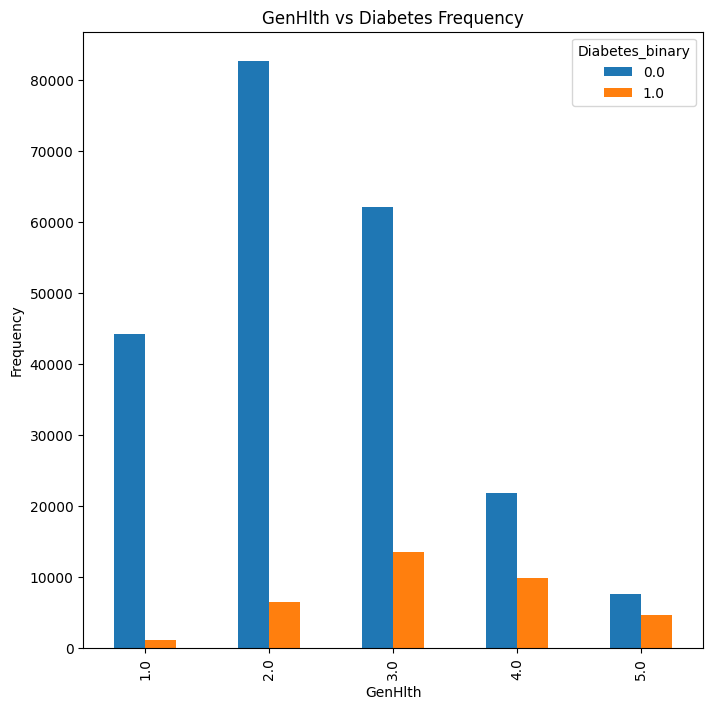

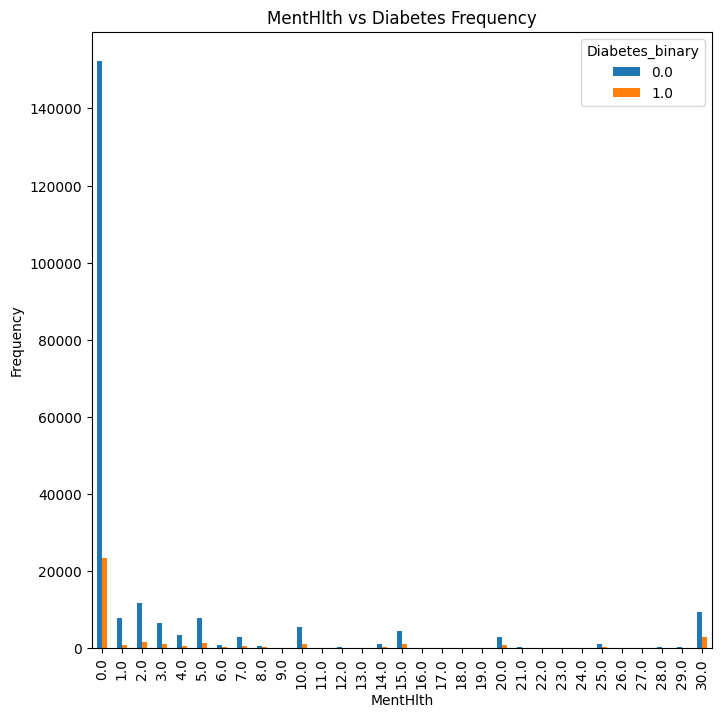

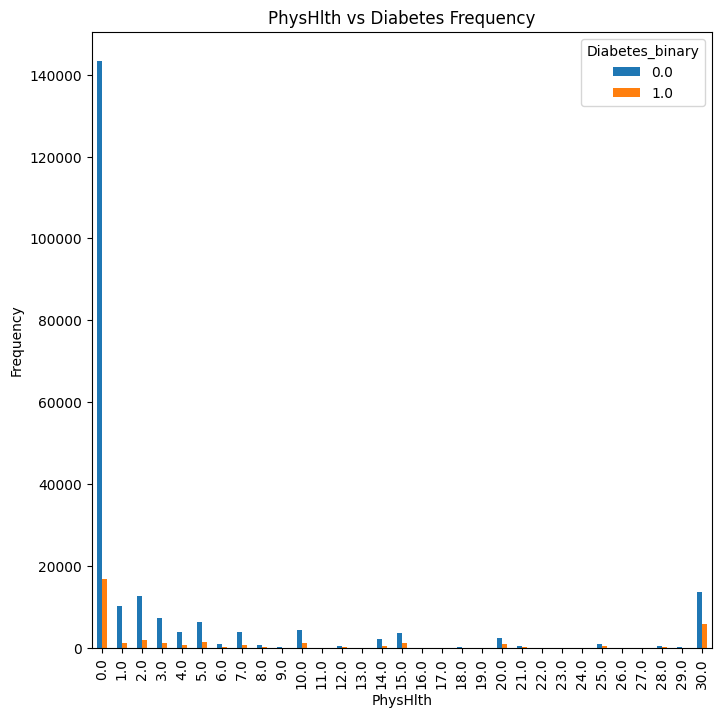

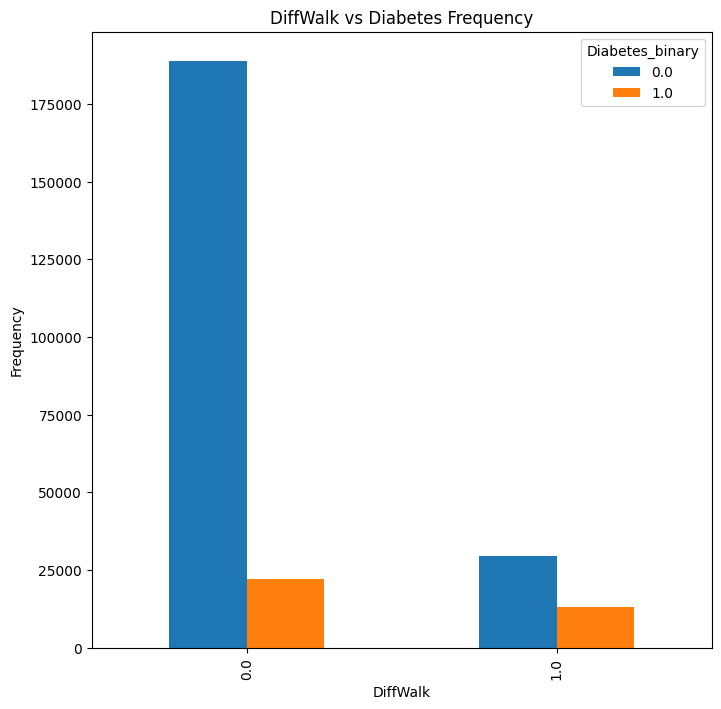

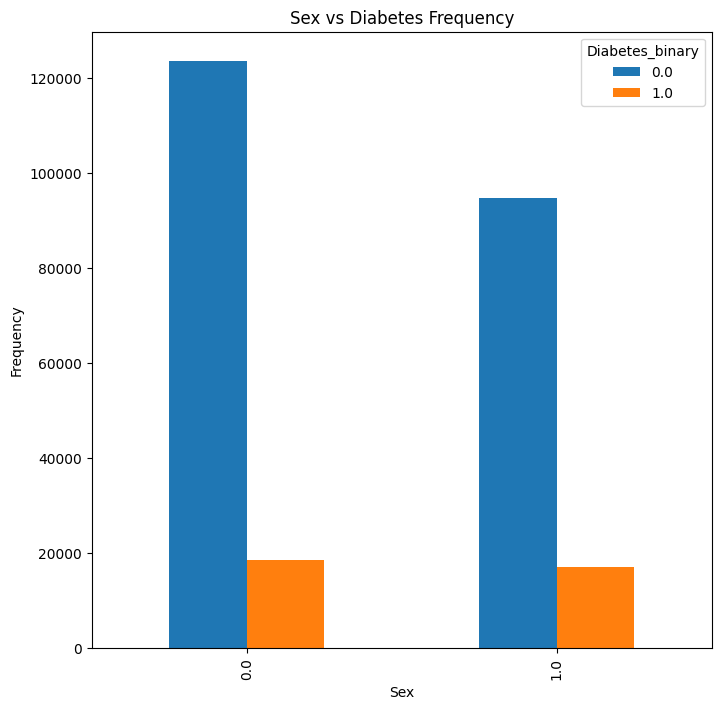

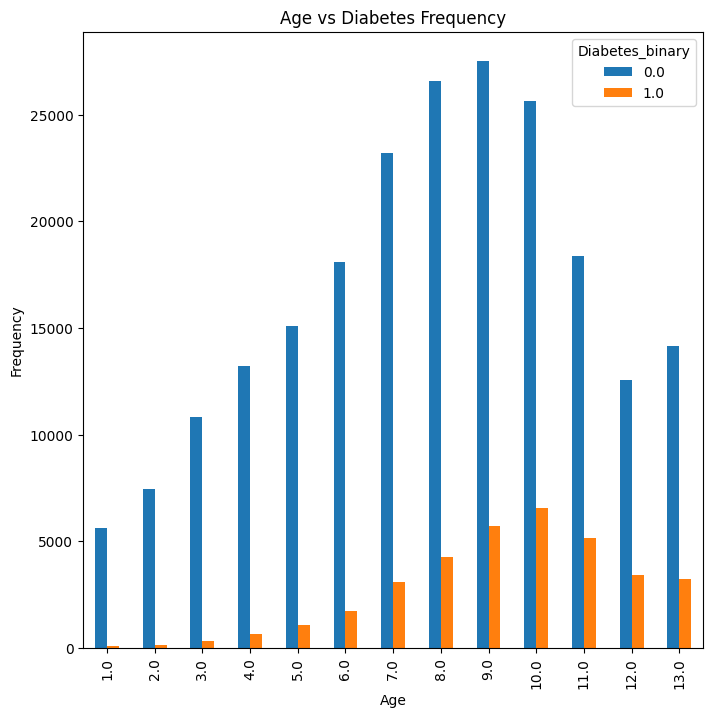

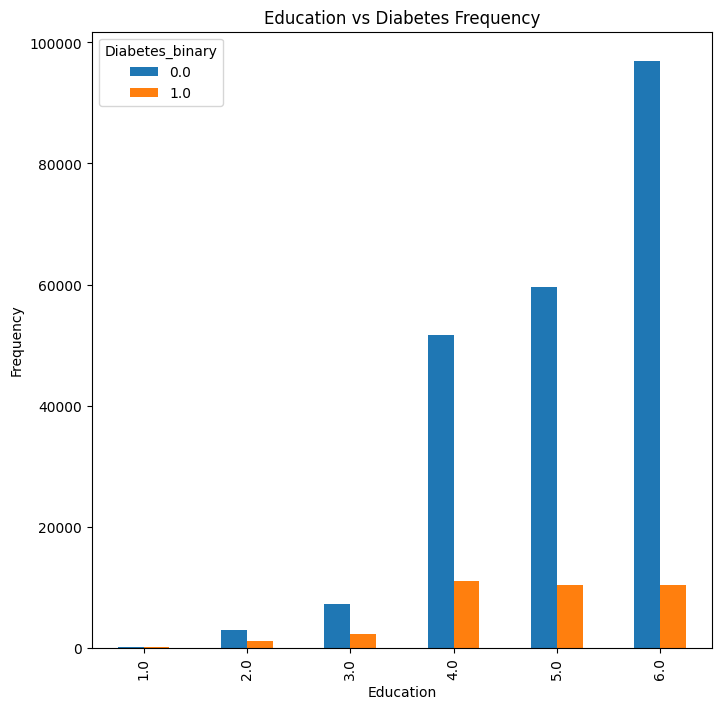

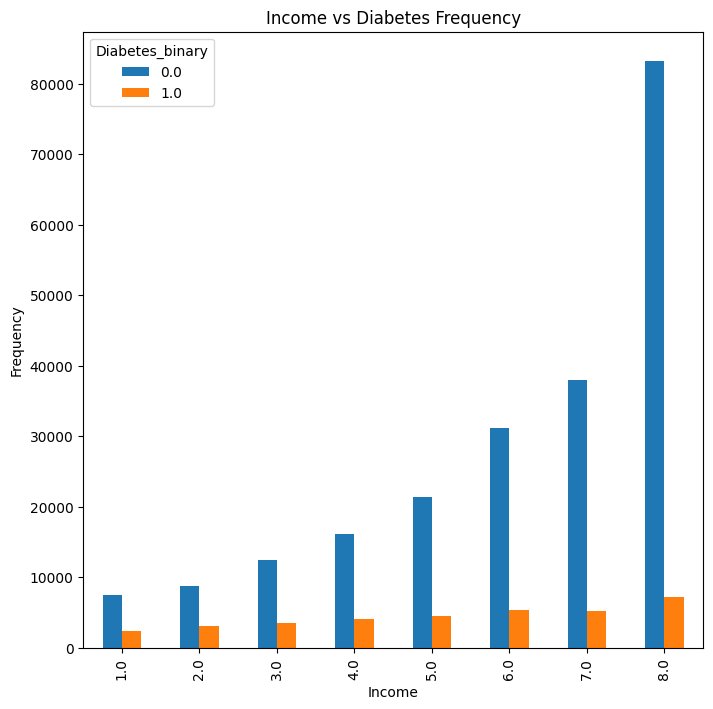

In [8]:
for column in df.columns[1:]:
    
    crosstab = pd.crosstab(df[column], df['Diabetes_binary'])
    crosstab.plot(kind="bar", figsize=(8,8))
    plt.title(f'{column} vs Diabetes Frequency')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Splitting the train and test data

In [28]:
from sklearn.model_selection import train_test_split 

X_train = df.drop(columns=['Diabetes_binary','HighBP', 'HighChol',])
y_train = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 5)


In [29]:
info(models, X_train, y_train, X_test, y_test)

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.8618
AUC-ROC Score: 0.5465
Confusion Matrix:
[[42947   781]
 [ 6231   777]]
Precision: 0.4987
Recall: 0.1109
F1 Score: 0.1814
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43728
         1.0       0.50      0.11      0.18      7008

    accuracy                           0.86     50736
   macro avg       0.69      0.55      0.55     50736
weighted avg       0.82      0.86      0.82     50736



Model: RandomForestClassifier
Accuracy: 0.8646
AUC-ROC Score: 0.5263
Confusion Matrix:
[[43454   274]
 [ 6595   413]]
Precision: 0.6012
Recall: 0.0589
F1 Score: 0.1073
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     43728
         1.0       0.60      0.06      0.11      7008

    accuracy                           0.86     50736
   macro avg       0.73      0.53      0.52     50736
weighted avg       0.83      0.86      0.81     50736



Model: Dec

## Trying different feature selection techniques


Irrelevant or partially relevant features can negatively impact model performance. 

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

1. Getting the top 10 features with every selection technique
2. Seeing sepretly how accurate the model is with only the selected ten features
3.  Seeing how accurate it is with the overlaping features

### Unvariate selection

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10) 
X_train_selected = selector.fit_transform(X_train, y_train)
US_selected_features = X_train.columns[selector.get_support()]
print("Selected features:", US_selected_features)

Selected features: Index(['BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')


### Feature importance 

[0.0043524  0.23248825 0.02570115 0.01044423 0.01881815 0.01829233
 0.02734011 0.02277445 0.00607484 0.00893866 0.01590369 0.07761885
 0.08026171 0.09829576 0.03047215 0.01935588 0.12435128 0.07673466
 0.10178147]


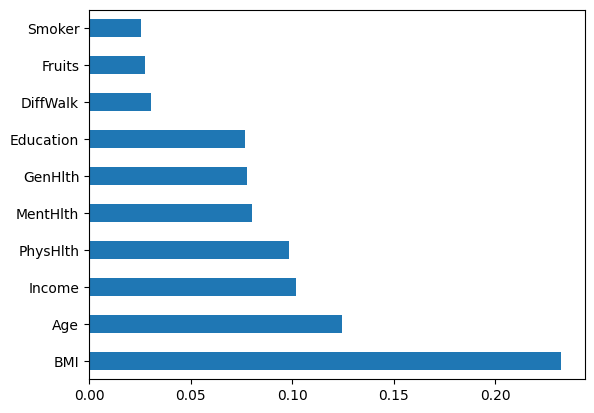

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier().fit(X_train, y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
FI_selected_features = feat_importances.nlargest(10).index
plt.show()

## Rec feature selection

In [12]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier 

estimator = RandomForestClassifier(n_estimators=100, max_depth=10, random_state = 5) # siia tuleb lõpuks valitud mudel

num_features_to_select = 10  
rfe = RFE(estimator, n_features_to_select=num_features_to_select)

X_selected = rfe.fit_transform(X_train, y_train)

selected_feature_indices = rfe.support_
RFE_selected_features = X_train.columns[selected_feature_indices]
print("Selected Features:", X_train.columns[selected_feature_indices])


Selected Features: Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Income'],
      dtype='object')


### The models and graphs for feature selection

In [13]:

models = [LogisticRegression(), RandomForestClassifier(n_estimators=100, max_depth=10, random_state = 5), DecisionTreeClassifier()]
# võtsid liiga kaua aega , SVC(probability=True), KNeighborsClassifier(), DecisionTreeClassifier()]

def info(models, X_train, y_train,X_test, y_test):
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        precision, recall, fscore, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
        print(f"Model: {type(model).__name__}")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"AUC-ROC Score: {roc_auc:.4f}")
        print(f"Confusion Matrix:\n{confusion}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {fscore:.4f}")
        print(classification_report(y_test,y_pred))
        print("\n")


In [18]:
#Unvariate selection
data_US = pd.concat([y_train, X_train[US_selected_features]], axis=1)

X_train_US = data_US.drop(columns=['Diabetes_binary'])
y_train_US = data_US['Diabetes_binary']

X_train_US, X_test_US, y_train_US, y_test_US = train_test_split(X_train_US, y_train_US, test_size = 0.2, random_state = 5)


In [17]:
info(models, X_train_US,y_train_US, X_test_US, y_test_US)

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.8611
AUC-ROC Score: 0.5647
Confusion Matrix:
[[34081   735]
 [ 4904   869]]
Precision: 0.5418
Recall: 0.1505
F1 Score: 0.2356
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     34816
         1.0       0.54      0.15      0.24      5773

    accuracy                           0.86     40589
   macro avg       0.71      0.56      0.58     40589
weighted avg       0.83      0.86      0.83     40589



Model: RandomForestClassifier
Accuracy: 0.8641
AUC-ROC Score: 0.5533
Confusion Matrix:
[[34387   429]
 [ 5086   687]]
Precision: 0.6156
Recall: 0.1190
F1 Score: 0.1994
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     34816
         1.0       0.62      0.12      0.20      5773

    accuracy                           0.86     40589
   macro avg       0.74      0.55      0.56     40589
weighted avg       0.83      0.86      0.82     40589



Model: Dec

In [ ]:
#Feature importance
data_FI = pd.concat([y_train, X_train[FI_selected_features]], axis=1)

X_train_FI = data_FI.drop(columns=['Diabetes_binary'])
y_train_FI = data_FI['Diabetes_binary']

X_train_FI, X_test_FI, y_train_FI, y_test_FI = train_test_split(X_train_FI, y_train_FI, test_size = 0.2, random_state = 5)
smote = SMOTEENN(random_state = 5)
X_smote_FI, y_smote_FI = smote.fit_resample(X_train, y_train)

In [ ]:
info(models, X_smote_FI, y_smote_FI, X_test_FI, y_test_FI)

In [ ]:
# Rec feature elimination
data_RFE = pd.concat([y_train, X_train[RFE_selected_features]], axis=1)

X_train_RFE = data_RFE.drop(columns=['Diabetes_binary'])
y_train_RFE = data_RFE['Diabetes_binary']

X_train_RFE, X_test_RFE, y_train_RFE, y_test_RFE = train_test_split(X_train_RFE, y_train_RFE, test_size = 0.2, random_state = 5)
smote = SMOTEENN(random_state = 5)
X_smote_RFE, y_smote_RFE = smote.fit_resample(X_train, y_train)


In [ ]:
info(models, X_smote_RFE, y_smote_RFE,  X_test_RFE, y_test_RFE)

In [ ]:
#Using all the features picked by feature selection
all_FS = ['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
          'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income', 'Fruits', 'Smoker', 'MentHlth']

data_all = pd.concat([y_train, X_train[all_FS]], axis=1)

X_train_all = data_all.drop(columns=['Diabetes_binary'])
y_train_all = data_all['Diabetes_binary']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_train_all, y_train_all, test_size = 0.2, random_state = 5)
smote = SMOTEENN(random_state = 5)
X_smote_all, y_smote_all = smote.fit_resample(X_train, y_train)

In [ ]:
info(models, X_smote_all, y_smote_all,  X_test_all, y_test_all)

In [ ]:
#Using the features that at least two feature selections have incommon
most_FS = ['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
          'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income','MentHlth']
data_most = pd.concat([y_train, X_train[most_FS]], axis=1)

X_train_most = data_most.drop(columns=['Diabetes_binary'])
y_train_most = data_most['Diabetes_binary']

X_train_most, X_test_most, y_train_most, y_test_most = train_test_split(X_train_most, y_train_most, test_size = 0.2, random_state = 5)
smote = SMOTEENN(random_state = 5)
X_smote_most, y_smote_most = smote.fit_resample(X_train, y_train)

In [ ]:
info(models, X_smote_most, y_smote_most, X_test_most, y_test_most)

In [ ]:
# algsed andmed
X_train = df.drop(columns=['Diabetes_binary'])
y_train = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 5)
smote = SMOTEENN(random_state = 5)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
info(models,X_smote, y_smote, X_test, y_test)

## Joonised


### Correlation Matrix with Heatmap

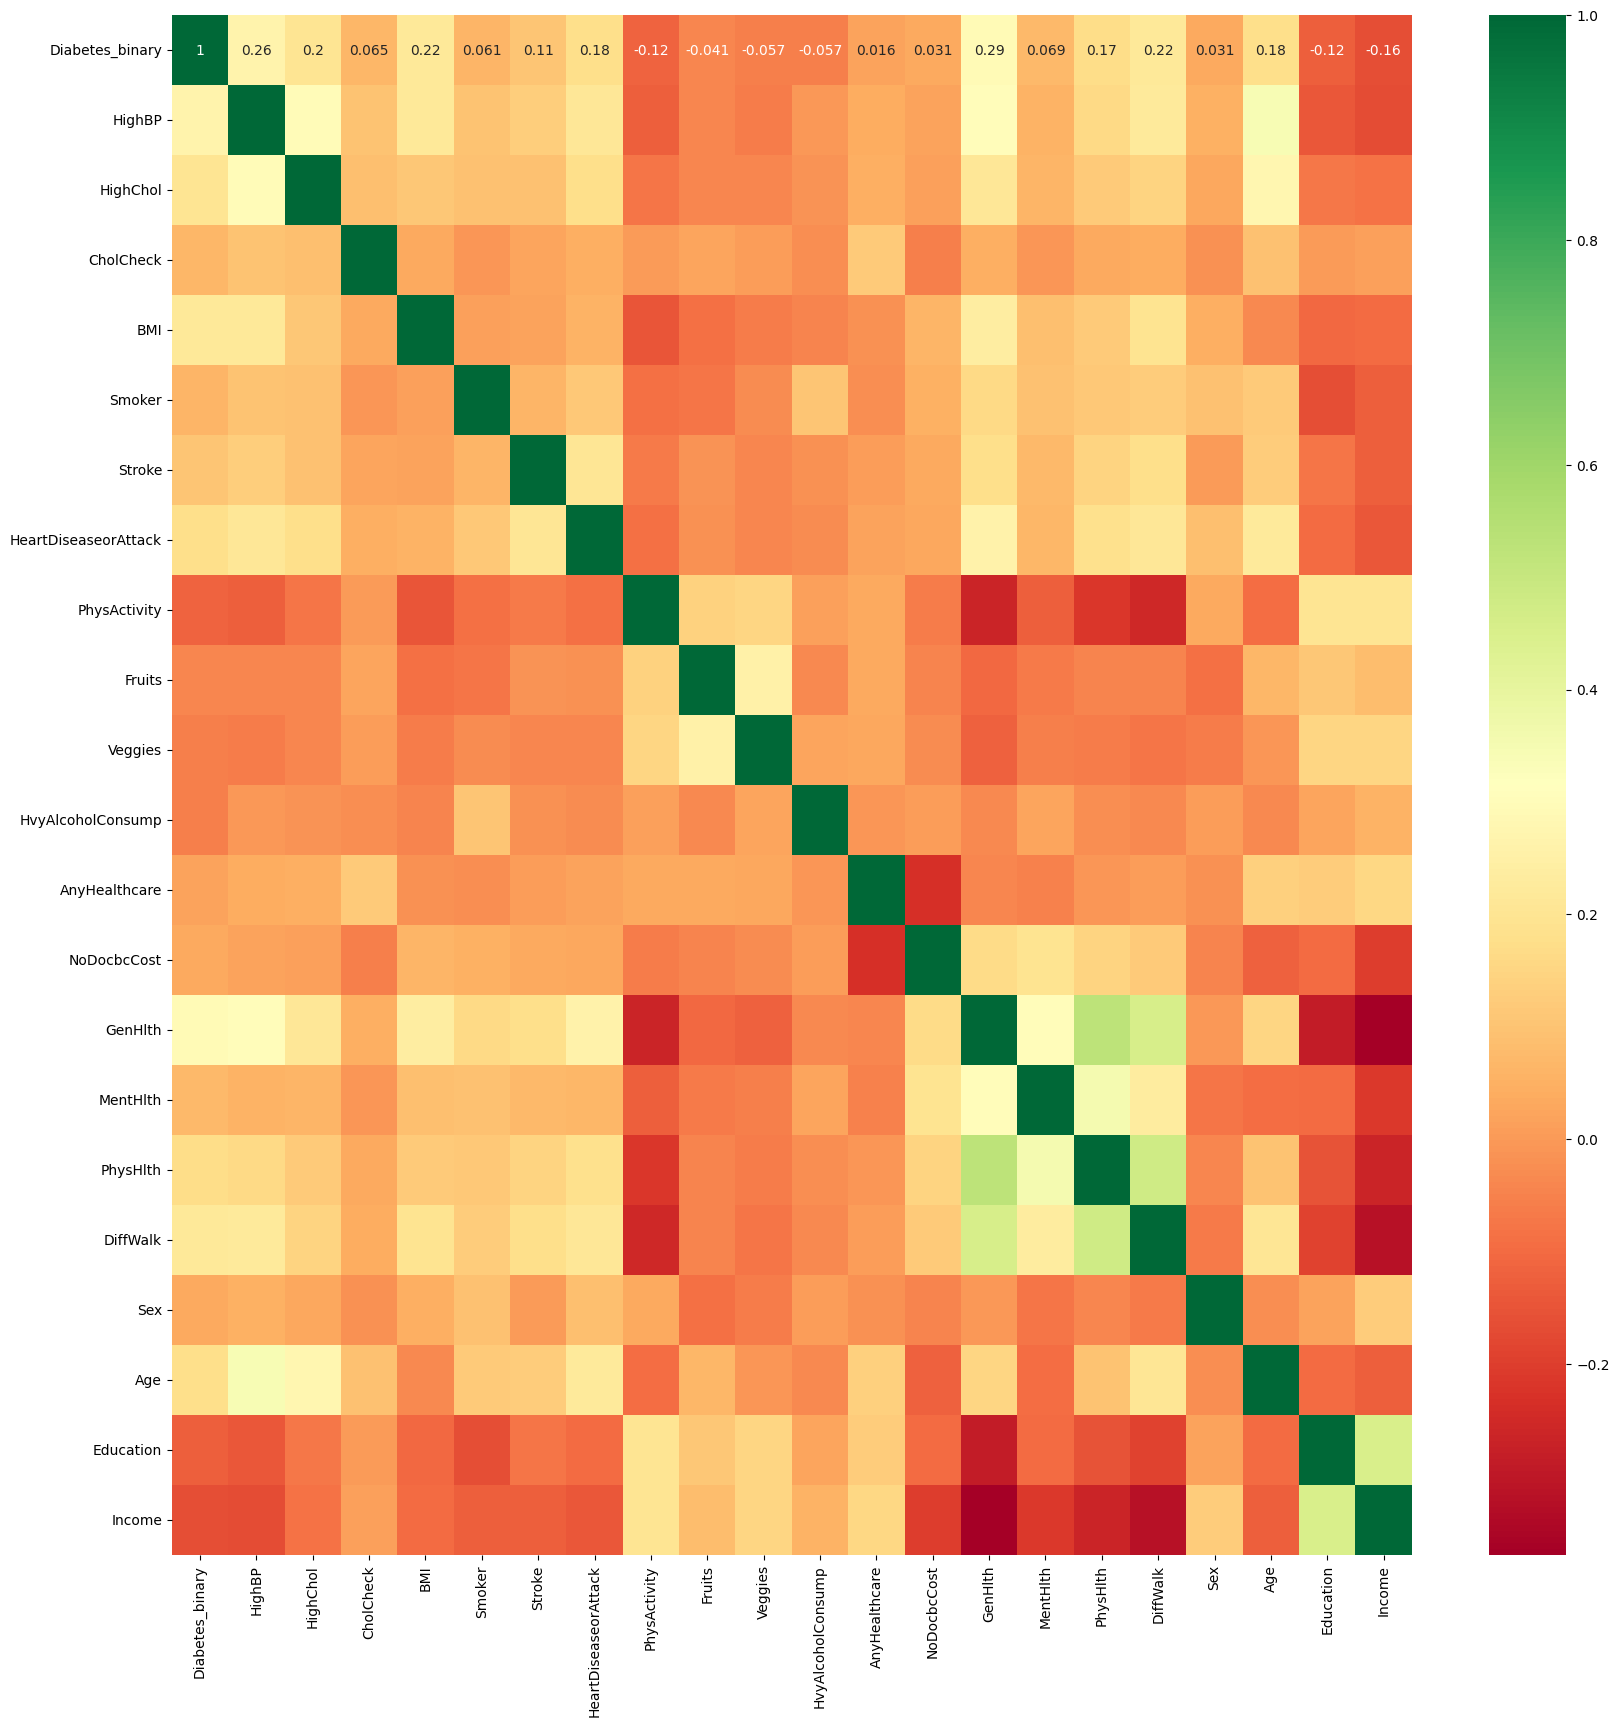

In [12]:
import seaborn as sns 

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Axes: >

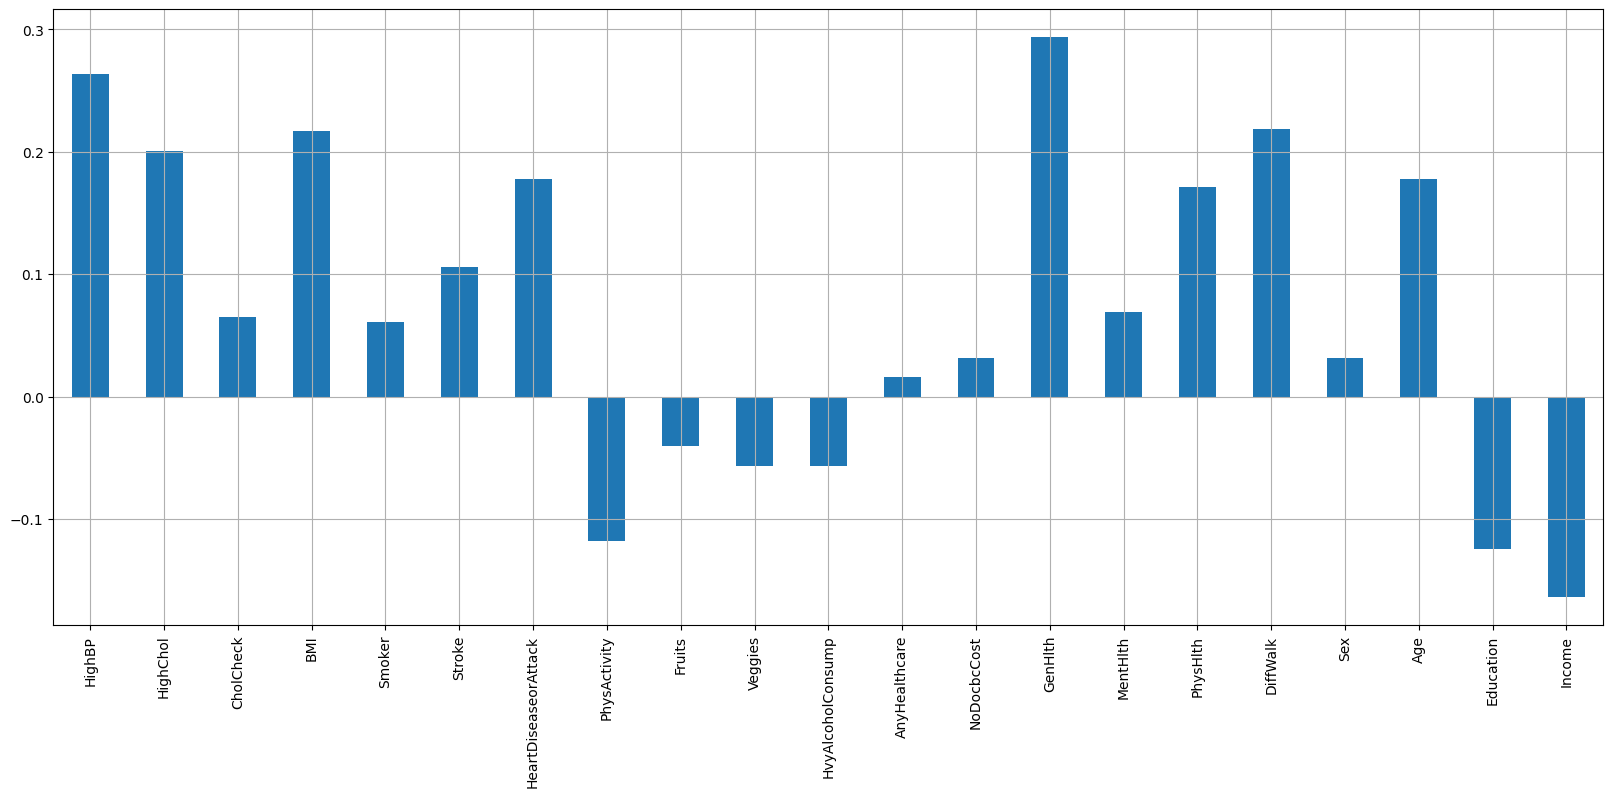

In [13]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8))

In [16]:
# võibolla huvitavad plotid
for feature in selected_features_US:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Diabetes_binary', y=feature, data=df, hue='HighBP', split=True, inner='quartile', palette='muted')
    plt.title('Violin Plot of '+feature+' by Diabetes Status')
    plt.xlabel('Diabetes Status (0: No Diabetes, 1: Diabetes)')
    plt.ylabel(feature)
    plt.show()

NameError: name 'selected_features_US' is not defined

### Analyzing columns with the highest correlations

In [15]:
(df.groupby('Diabetes_binary')['HighBP'].value_counts()/df.groupby('Diabetes_binary')['HighChol'].count()).round(4)*100

Diabetes_binary  HighBP
0.0              0.0       62.34
                 1.0       37.66
1.0              1.0       75.27
                 0.0       24.73
dtype: float64

In individuals with diabetes (Diabetes_binary == 1.0), the occurrence of high blood pressure (HighBP == 1.0) is 75.27%, whereas in those without diabetes, it is 37.66%. This suggests that individuals with diabetes are more likely to have high blood pressure compared to those without diabetes.

In [16]:
(df.groupby('Diabetes_binary')['HighChol'].value_counts()/df.groupby('Diabetes_binary')['HighChol'].count()).round(4)*100

Diabetes_binary  HighChol
0.0              0.0         61.57
                 1.0         38.43
1.0              1.0         67.01
                 0.0         32.99
dtype: float64

In individuals with diabetes (Diabetes_binary == 1.0), the occurrence of high cholesterol (HighChol == 1.0) is 67.01%, whereas in those without diabetes, it is 38.43%. This suggests that individuals with diabetes are more likely to have high cholesterol compared to those without diabetes.

In [17]:
(df.groupby('Diabetes_binary')['DiffWalk'].value_counts()/df.groupby('Diabetes_binary')['DiffWalk'].count()).round(4)*100

Diabetes_binary  DiffWalk
0.0              0.0         86.46
                 1.0         13.54
1.0              0.0         62.88
                 1.0         37.12
dtype: float64

On average, those with diabetes had serious difficulty walking or climbing stairs more.

In individuals with diabetes (Diabetes_binary == 1.0), the occurrence of a heart disease or attack is 22.09%, whereas in those without diabetes, it is 7.34%. This suggests that individuals with diabetes are more likely to have heart disease or attack compared to those without diabetes.

In [18]:
(df.groupby('Diabetes_binary')['HighChol'].value_counts()/df.groupby('Diabetes_binary')['HighChol'].count()).round(4)*100

Diabetes_binary  HighChol
0.0              0.0         61.57
                 1.0         38.43
1.0              1.0         67.01
                 0.0         32.99
dtype: float64

In [19]:
df_no = df[df['Diabetes_binary'] == 0]
df_yes = df[df['Diabetes_binary'] == 1]
df_no_genhlth = df_no['GenHlth']
df_yes_genhlth = df_yes['GenHlth']

print(df_yes_genhlth.mean())
print(df_no_genhlth.mean())

3.290980591863294
2.3851850834043256


Those with diabetes rate their general health with 3.29, which is between 'good' and 'fair'.
Those without diabetes rater their general health with 2.39, which is between 'very good' and 'good'.

In [20]:
df_no = df[df['Diabetes_binary'] == 0]
df_yes = df[df['Diabetes_binary'] == 1]
df_no_physhlth = df_no['PhysHlth']
df_yes_physhlth = df_yes['PhysHlth']

print(df_yes_physhlth.mean())
print(df_no_physhlth.mean())

7.954478583149437
3.6410820119633223


The average number of days in the last 30 days during which individuals reported not feeling well in terms of physical health was 7.95 for those with diabetes and 3.64 for those without diabetes.

In [21]:
df.groupby('Diabetes_binary')['BMI'].describe().round()

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,,,,,,,,
0.0,218334.0,28.0,6.0,12.0,24.0,27.0,31.0,98.0
1.0,35346.0,32.0,7.0,13.0,27.0,31.0,35.0,98.0


The average BMI is higher among individuals with diabetes compared to those without diabetes.

In [22]:
df_no = df[df['Diabetes_binary'] == 0]
df_yes = df[df['Diabetes_binary'] == 1]
df_no_age = df_no['Age']
df_yes_age = df_yes['Age']

print(df_yes_age.mean())
print(df_no_age.mean())

9.379052792395179
7.814064689878809


The average age for those with diabetes is around 60-64 years.
The average age for those without diabetes is 40-44 years.

## Model building and evalution

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.metrics import mean_squared_error, roc_auc_score
from math import sqrt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

models = [LogisticRegression(), RandomForestClassifier(n_estimators=100, max_depth=10, random_state = 5),DecisionTreeClassifier()]

info(models, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models = [LogisticRegression(), RandomForestClassifier(n_estimators=100, max_depth=10, random_state = 5)]

plt.figure(figsize=(8, 8))

for model in models:
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Undersampling


In [12]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_recall_fscore_support

rus = RandomUnderSampler(random_state = 5)
X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)


models = [LogisticRegression(), RandomForestClassifier(n_estimators=100, max_depth=10, random_state = 5)]

info(models, X_undersampled, y_sampled, X_test, y_test)

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7247
AUC-ROC Score: 0.7373
Confusion Matrix:
[[31479 12249]
 [ 1719  5289]]
Precision: 0.3016
Recall: 0.7547
F1 Score: 0.4309


Model: RandomForestClassifier
Accuracy: 0.7184
AUC-ROC Score: 0.7504
Confusion Matrix:
[[30880 12848]
 [ 1439  5569]]
Precision: 0.3024
Recall: 0.7947
F1 Score: 0.4381




In [ ]:
plt.figure(figsize=(8, 8))

for model in models:
    model.fit(X_undersampled, y_undersampled)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Oversampling using RandomOverSampler

In [36]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_recall_fscore_support


ros = RandomOverSampler(random_state = 5)
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

models = [LogisticRegression(), RandomForestClassifier(n_estimators=100, max_depth=10, random_state = 5)]

info(models, X_oversampled, y_oversampled, X_test, y_test)


C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7227
AUC-ROC Score: 0.7417
Confusion Matrix:
[[31239 12428]
 [ 1640  5429]]
Precision: 0.3040
Recall: 0.7680
F1 Score: 0.4356


Model: RandomForestClassifier
Accuracy: 0.7264
AUC-ROC Score: 0.7533
Confusion Matrix:
[[31268 12399]
 [ 1481  5588]]
Precision: 0.3107
Recall: 0.7905
F1 Score: 0.4460




In [ ]:
plt.figure(figsize=(8, 8))

for model in models:
    model.fit(X_oversampled, y_oversampled)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Oversampling using smote

In [15]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_recall_fscore_support


smote = SMOTE(random_state = 5)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

models = [LogisticRegression(), RandomForestClassifier(n_estimators=100, max_depth=10, random_state = 5), DecisionTreeClassifier()]


info(models, X_smote, y_smote, X_test, y_test)

C:\Users\karenro\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7274
AUC-ROC Score: 0.7417
Confusion Matrix:
[[31568 12160]
 [ 1672  5336]]
Precision: 0.3050
Recall: 0.7614
F1 Score: 0.4355
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     43728
         1.0       0.30      0.76      0.44      7008

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736



Model: RandomForestClassifier
Accuracy: 0.8179
AUC-ROC Score: 0.6893
Confusion Matrix:
[[37913  5815]
 [ 3423  3585]]
Precision: 0.3814
Recall: 0.5116
F1 Score: 0.4370
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.89     43728
         1.0       0.38      0.51      0.44      7008

    accuracy                           0.82     50736
   macro avg       0.65      0.69      0.66     50736
weighted avg       0.84      0.82      0.83     50736



Model: Dec

## Kõige paremate tulemustega kood

In [46]:
is1 = df['Diabetes_binary'] == 1
brfss_5050_1 = df[is1]

#Get the 0s
is0 = df['Diabetes_binary'] == 0
brfss_5050_0 = df[is0] 

#Select the 39977 random cases from the 0 (non-diabetes group). we already have 35346 cases from the diabetes risk group
brfss_5050_0_rand1 = brfss_5050_0.take(np.random.permutation(len(brfss_5050_0))[:35346])

#Append the 39977 1s to the 39977 randomly selected 0s
brfss_5050 = pd.concat([brfss_5050_0_rand1, brfss_5050_1], ignore_index=True)


In [49]:
from sklearn.model_selection import train_test_split 

#X_train = brfss_5050.drop(columns=['Diabetes_binary','HighBP', 'HighChol',])
X_train = brfss_5050.drop(columns=['Diabetes_binary'])
y_train = brfss_5050['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 5)


In [50]:
info(models, X_train, y_train,X_test, y_test)

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.7428
AUC-ROC Score: 0.7427
Confusion Matrix:
[[5066 1967]
 [1670 5436]]
Precision: 0.7343
Recall: 0.7650
F1 Score: 0.7493
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74      7033
         1.0       0.73      0.76      0.75      7106

    accuracy                           0.74     14139
   macro avg       0.74      0.74      0.74     14139
weighted avg       0.74      0.74      0.74     14139



Model: RandomForestClassifier
Accuracy: 0.7491
AUC-ROC Score: 0.7489
Confusion Matrix:
[[4982 2051]
 [1496 5610]]
Precision: 0.7323
Recall: 0.7895
F1 Score: 0.7598
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      7033
         1.0       0.73      0.79      0.76      7106

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



Model: DecisionTre

C:\Users\Kristina\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


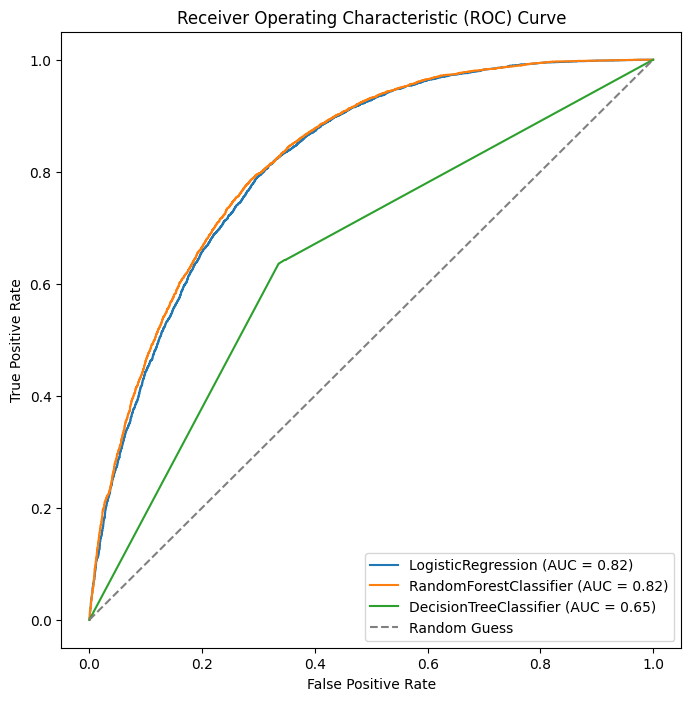

In [52]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(8, 8))

for model in models:
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{type(model).__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()